<h1>Assingment II</h1>

<h3>Importing libraries</h3>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

<h3>Loading in the data</h3>

In [6]:
import os

target_file = "OnlineNewsPopularity.csv"
found = False

# Search in the current directory and all subdirectories
for root, dirs, files in os.walk("."):
    if target_file in files:
        # Construct the full file path
        file_path = os.path.join(root, target_file)
        print(f"Found '{target_file}' at: {file_path}")
        df = pd.read_csv(file_path)
        print("CSV file loaded successfully!")
        found = True
        break

if not found:
    print(f"The file '{target_file}' was not found.")

Found 'OnlineNewsPopularity.csv' at: ./OnlineNewsPopularity/OnlineNewsPopularity.csv
CSV file loaded successfully!


<h3>Inspecting the data</h3>

In [10]:
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [12]:
print(df.shape)

(39644, 61)


In [14]:
print(df.isna().sum())

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [18]:
summary_stats = df.describe()
summary_stats_table = pd.DataFrame(summary_stats)
display(summary_stats_table)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


<body>
    <p>This dataset focuses on predicting the popularity of online news articles, where the <code>shares</code> column serves as the target variable, representing the number of times an article was shared. The dataset includes various features such as metadata (e.g., number of words, links, or images), engagement metrics, and topic-specific variables to capture the characteristics of the articles. The target variable, shares, is skewed, with some articles achieving viral popularity while others remain less circulated.
    </p>
</body>

<body>
    <h3>Data preprocessing</h3>
    <h4>Converting the target varaible shares column into a binary variable</h4>
</body>

In [22]:
# clean up the column names
df.columns = df.columns.str.strip()

# convert the shares column into a binary variable
df["shares_binary"] = df["shares"].apply(lambda x: 1 if x >= 1400 else 0)

# drop unnecessary columns
df_clean = df.drop(columns=["url","shares"]) 
display(df_clean)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_binary
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,0


<body>
    <h2>Assignment Part I</h2>
</body>

<h3>Imports and Setup</h3>

In [26]:
# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Setup of X and y
X = df_clean.drop("shares_binary", axis=1).values
print(X.shape)
y = df_clean["shares_binary"].values
print(y.shape)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define scalers
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
}

classifiers = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {"model__C": [0.01, 0.1, 1, 10, 100]}
    },
    "LinearSVC": {
        "model": LinearSVC(max_iter=10000, dual=False),
        "params": {"model__C": [0.01, 0.1, 1, 10, 100]}
    },
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {"model__n_neighbors": [3, 5, 7, 9]}
    }
}

results = []

# Perform experiments with scaling and classification
for scaler_name, scaler in scalers.items():
    for classifier_name, classifier_info in classifiers.items():
        # Build pipeline
        pipeline = Pipeline([
            ("scaler", scaler),
            ("model", classifier_info["model"])
        ])

        # Perform GridSearchCV
        grid = GridSearchCV(pipeline, classifier_info["params"], cv=5, scoring="accuracy")
        grid.fit(X_train, y_train)

        # Get predictions
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        # Evaluate and store results
        result_entry = {
            "Model": classifier_name,
            "Scaler": scaler_name,
            "Test Accuracy": accuracy_score(y_test, y_pred),
            "Best Params": grid.best_params_
        }
        for score in ["macro", "micro"]:
            result_entry[f"{score}_precision"] = precision_score(y_test, y_pred, average=score)
            result_entry[f"{score}_recall"] = recall_score(y_test, y_pred, average=score)
            result_entry[f"{score}_f1"] = f1_score(y_test, y_pred, average=score)

        # Append the result to the list
        results.append(result_entry)

# Display results
results_df = pd.DataFrame(results)
display(results_df)

(39644, 59)
(39644,)


,Model,Scaler,Test Accuracy,Best Params,macro_precision,macro_recall,macro_f1,micro_precision,micro_recall,micro_f1
0,LogisticRegression,StandardScaler,0.651911,{'model__C': 1},0.651159,0.649465,0.649548,0.651911,0.651911,0.651911
1,LinearSVC,StandardScaler,0.652541,{'model__C': 1},0.651702,0.650334,0.650459,0.652541,0.652541,0.652541
2,KNeighborsClassifier,StandardScaler,0.619624,{'model__n_neighbors': 9},0.619128,0.619339,0.619139,0.619624,0.619624,0.619624
3,LogisticRegression,MinMaxScaler,0.653298,{'model__C': 100},0.652546,0.650898,0.650996,0.653298,0.653298,0.653298
4,LinearSVC,MinMaxScaler,0.647118,{'model__C': 1},0.646322,0.644613,0.644664,0.647118,0.647118,0.647118
5,KNeighborsClassifier,MinMaxScaler,0.609787,{'model__n_neighbors': 9},0.608687,0.608483,0.608543,0.609787,0.609787,0.609787


<body>
    <p>Logistic Regression: Lower values of C improve the model's generalization by enhancing regularization, though this slightly reduces accuracy. Feature scaling improves performance, with MinMaxScaler slightly outperforming StandardScaler.</p>
    <p>Linear SVC: The value of C significantly influences model performance, with C=1 striking a balance between regularization and accuracy. Feature scaling is crucial, and both StandardScaler and MinMaxScaler yield comparable results.</p> 
    <p>K-Neighbors Classifier: Using a higher number of neighbors, such as n_neighbors=9, improves performance, but it still underperforms compared to Logistic Regression and Linear SVC. Feature scaling is important, with StandardScaler providing slightly better results than MinMaxScaler.</p>
</body>


<h2>Assignment Part II</h2>

<body>
    <h3>DecisionTreeClassifier</h3>
</body>

In [30]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Initialize a results dictionary
results_dt = {}

# Instantiate the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Fit to the training set
dt.fit(X_train, y_train)

# Predict the labels of test set
dt_test_pred = dt.predict(X_test)

# Compute valuation metrics
results_dt["dt_test_accuracy"] = accuracy_score(y_test, dt_test_pred)
for score in ["macro", "micro"]:
    results_dt[f"{score}_precision"] = precision_score(y_test, dt_test_pred, average=score)
    results_dt[f"{score}_recall"] = recall_score(y_test, dt_test_pred, average=score)
    results_dt[f"{score}_f1"] = f1_score(y_test, dt_test_pred, average=score)

# Display results
results_dt_df = pd.DataFrame([results_dt])
display(results_dt_df)

,dt_test_accuracy,macro_precision,macro_recall,macro_f1,micro_precision,micro_recall,micro_f1
0,0.582545,0.581202,0.580935,0.580964,0.582545,0.582545,0.582545


<body>
    <h5>Interpretting the results:</h5>
    <p>The classifier achieved an accuracy of approximately 58.25% on the test set, which indicates the proportion of correct predictions. The precision, recall, and F1 scores are evaluated under both macro and micro averaging schemes. Macro-averaging, which treats each class equally, resulted in precision, recall, and F1 scores of approximately 58.12%, 58.09%, and 58.10%, respectively. These scores suggest moderate performance across all classes, regardless of class imbalance. Micro-averaging, which accounts for the actual support yielded to 58.25%. 
    </p>
</body>

<body>
    <h4>Grid Search</h4>
</body>

In [39]:
from sklearn.metrics import classification_report

# Define the parameter grid for grid search
dt_param_grid = {
    'max_depth': [5, 7, 10, 15, 20, None], 
    'max_features': [0.2, 0.4,0.6, 0.8, None]  
}

# Set up the grid search
dt_grid = GridSearchCV(
    estimator = dt,
    param_grid = dt_param_grid,
    scoring = 'accuracy',
    cv = 5,  
    verbose = 1,
    n_jobs = -1 
)

# Fit the grid search to the data
dt_grid.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = dt_grid.best_params_
best_model = dt_grid.best_estimator_

# Evaluate on the test set
dt_grid_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, dt_grid_test_pred)

# Print results
print("Best Hyperparameters:", best_params)
print("Best Model Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, dt_grid_test_pred))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'max_depth': 7, 'max_features': 0.8}
Best Model Test Accuracy: 0.6490099634254004
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.57      0.61      3774
           1       0.65      0.72      0.68      4155

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



<body>
    <h5>Interpretting the results:</h5>
</body>

<body>
    <h4>Training vs Validation Accuracy</h4>
</body>

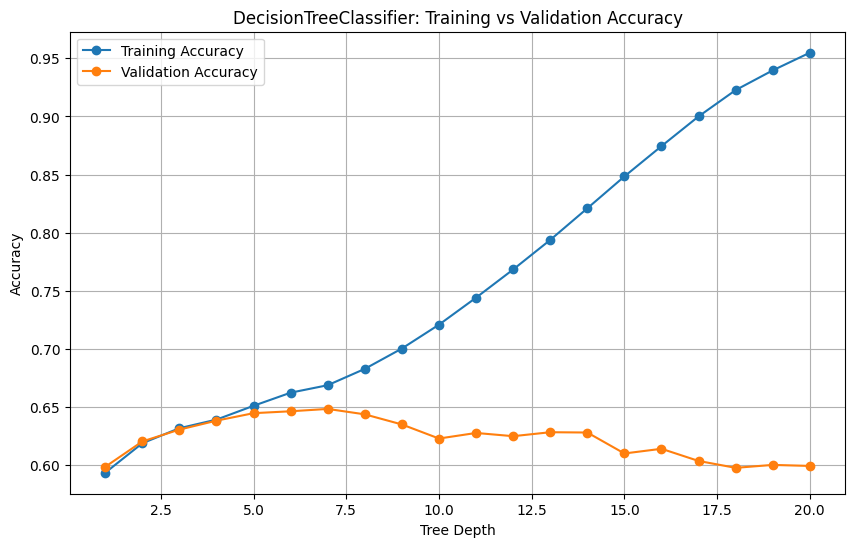

In [41]:
depths = range(1, 21)
train_accuracies = []
val_accuracies = []

for depth in depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    train_accuracies.append(dt_temp.score(X_train, y_train))
    val_accuracies.append(dt_temp.score(X_test, y_test))
    
# Plot Training vs Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label="Training Accuracy", marker="o")
plt.plot(depths, val_accuracies, label="Validation Accuracy", marker="o")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("DecisionTreeClassifier: Training vs Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

<body>
    <h5>Interpretting the plot:</h5>
    <p>The plot shows the relationship between <code>tree depth</code> and <code>model accuracy</code> on both the training and validation sets. As the tree depth increases, training accuracy steadily rises, eventually approaching 1.0, indicating that the model memorizes the training data well. However, the validation accuracy initially improves, peaking around a depth of 6 to 8, before starting to decline as the tree grows deeper. This divergence between training and validation accuracy beyond a depth of 8 is a clear sign of overfitting, as the model captures more and more noise in the training data at the expense of its ability to generalize to the test set. Therefore, the optimal tree depth for this model lies between 6 and 8, which is in line with the findigs of the grid search above.
    </p>
</body>

<body>
    <h3>RandomForestClassifier</h3>
</body>

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a results dictionary to store outputs
results_rf = {}

# Instantiate the DecisionTreeClassifier
rf = RandomForestClassifier(random_state=42)

# Fit to the training set
rf.fit(X_train, y_train)

# Predict the labels of test set
rf_test_pred = rf.predict(X_test)

# Compute evaluation metrics
results_rf["dt_test_accuracy"] = accuracy_score(y_test, rf_test_pred)
for score in ["macro", "micro"]:
    results_rf[f"{score}_precision"] = precision_score(y_test, rf_test_pred, average=score)
    results_rf[f"{score}_recall"] = recall_score(y_test, rf_test_pred, average=score)
    results_rf[f"{score}_f1"] = f1_score(y_test, rf_test_pred, average=score)

# Display results
results_rf_df = pd.DataFrame([results_rf])
display(results_rf_df)

,dt_test_accuracy,macro_precision,macro_recall,macro_f1,micro_precision,micro_recall,micro_f1
0,0.669567,0.66943,0.666689,0.66675,0.669567,0.669567,0.669567


<body>
    <h5>Interpretting the results:</h5>
    <p>The model achieved an overall test accuracy of 66.96%, indicating that approximately two-thirds of the test samples were correctly classified. The micro-averaged metrics are all 0.669567, closely aligning with the overall accuracy. This suggests consistent performance across all samples and a balanced contribution from each class. The similarity between the macro and micro scores indicates that the dataset likely does not have significant class imbalances, and the model performs uniformly across the dataset. However, the moderate overall accuracy suggests there may still be room for improvement in the model's ability to generalize.</p>
    <h4>DecisionTreeClassifier vs RandomForestClassifier</h4>
    <ol>
        <i><li>How are decision tree classifiers different from random forests on a structural level?</li></i>
        <p>Decision tree classifiers consist of a single tree structure, while random forests aggregate predictions from multiple decision trees, leveraging ensemble learning for better generalization and robustness.
        </p>
        <i><li>Where would you choose decision trees over random forests and vice-versa?</li></i>
        <p>Decision trees suit small, interpretable datasets; random forests excel in large, complex datasets to reduce overfitting. For example, it is good practice to use decision trees for a small feature subset analysis and random forests for large feature-rich datasets, such as the dataset at hand.
        </p>
        <i><li>Is accuracy an appropriate evaluation metric for this classification task?</li></i>
        <p>Accuracy is insufficient if class imbalance exists; so we have to consider precision, recall, and F1-score to capture model performance.
        </p>
    </ol>
    <h4>Grid Search</h4>
</body>

In [55]:
# Define the parameter grid for grid search
rf_param_grid = {
    "max_depth": [5, 10, 15], 
    "max_features": [0.2, 0.4, 0.6, 0.8],
    "n_estimators": [100, 300]
}

# Set up the grid search
rf_grid = GridSearchCV(
    estimator = rf,
    param_grid = rf_param_grid,
    scoring = 'accuracy',
    cv = 3,
    verbose = 1,
    n_jobs = -1  
)

# Fit the grid search to the data
rf_grid.fit(X_train, y_train)

# Get the best parameters and the best model
rf_best_params = rf_grid.best_params_
rf_best_model = rf_grid.best_estimator_

# Evaluate on the test set
rf_grid_test_pred = rf_best_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_grid_test_pred)

# Print results
print("Best Hyperparameters:", rf_best_params)
print("Best Model Test Accuracy:", rf_test_accuracy)
print("Classification Report:\n", classification_report(y_test, rf_grid_test_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'max_depth': 15, 'max_features': 0.2, 'n_estimators': 300}
Best Model Test Accuracy: 0.6747383024341027
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.60      0.64      3774
           1       0.67      0.74      0.71      4155

    accuracy                           0.67      7929
   macro avg       0.68      0.67      0.67      7929
weighted avg       0.68      0.67      0.67      7929



<body>
    <h5>Interpretting the results:</h5>
    <p>The grid search identified the best hyperparameters for the random forest model as a maximum depth of 15, maximum features set to 20% of the features, and 300 estimators. The model achieved a test accuracy of 67.47%, with a classification report showing a precision of 0.68, recall of 0.60, and an F1-score of 0.64 for class 0, while class 1 had a precision of 0.67, recall of 0.74, and an F1-score of 0.71. Overall, the weighted and macro-averaged precision, recall, and F1-scores were 0.68, 0.67, and 0.67, respectively. The model performed slightly better on class 1, with higher recall and F1-scores, indicating a balanced but slightly class-biased performance.
    </p>
    <h4>Robustness Testing with Noise</h4>
</body>

In [45]:
# Train models on original data
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Evaluate models on noisy datasets
noise_levels = [0, 0.1, 0.2, 0.5, 1.0]
dt_accuracies = []
rf_accuracies = []

for noise in noise_levels:
    # Add Gaussian noise to the test set
    X_test_noisy = X_test + np.random.normal(0, noise, X_test.shape)
    
    # Evaluate Decision Tree
    dt_pred = dt.predict(X_test_noisy)
    dt_accuracy = accuracy_score(y_test, dt_pred)
    dt_accuracies.append(dt_accuracy)
    
    # Evaluate Random Forest
    rf_pred = rf.predict(X_test_noisy)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_accuracies.append(rf_accuracy)

accuracy_data = {
    noise: [dt_acc, rf_acc] 
    for noise, dt_acc, rf_acc in zip(noise_levels, dt_accuracies, rf_accuracies)
}
noise_accurecy_df = pd.DataFrame(accuracy_data, index=['dt', 'rf'])
display(noise_accurecy_df)

,0.0,0.1,0.2,0.5,1.0
dt,0.582545,0.534998,0.522386,0.499559,0.485938
rf,0.669567,0.651911,0.627948,0.577879,0.532223


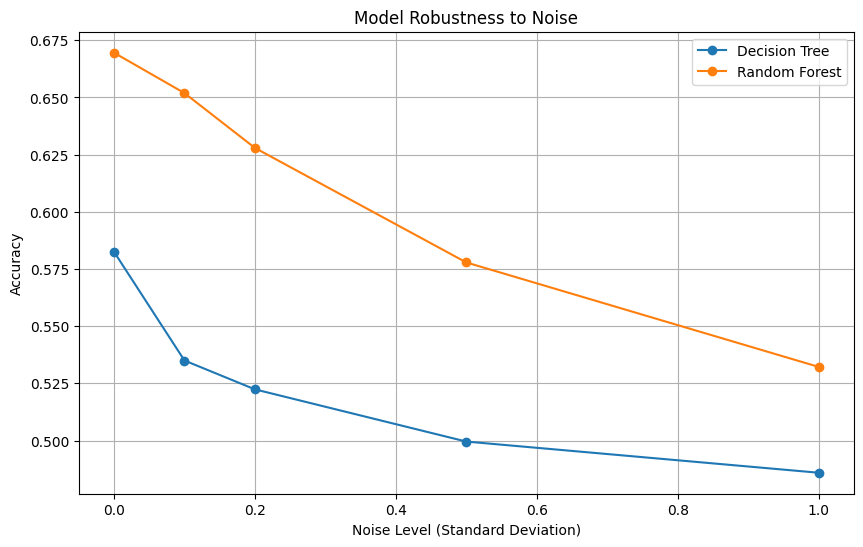

In [47]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, dt_accuracies, label="Decision Tree", marker='o')
plt.plot(noise_levels, rf_accuracies, label="Random Forest", marker='o')
plt.xlabel("Noise Level (Standard Deviation)")
plt.ylabel("Accuracy")
plt.title("Model Robustness to Noise")
plt.legend()
plt.grid(True)
plt.show()

<body>
    <p>Random Forest is more robust to noise due to its ensemble nature, which averages predictions, reducing sensitivity to data distortions. Noise deteriorates generalization performance, but Random Forest maintains higher accuracy than Decision Tree at all noise levels, demonstrating better resilience against random variations in input features.
    </p>
</body>